In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lpWpcVODTFeXVRtEZAyf")
project = rf.workspace("wheat-heads").project("wheat-heads-afhjy")
version = project.version(2)
dataset = version.download("yolov8")



/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Wheat-heads-2 in yolov8:: 100%|██████████| 3624/3624 [00:00<00:00, 5617.69it/s]


In [7]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/kaggle/working
100%|███████████████████████████████████████| 52.4M/52.4M [00:00<00:00, 172MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/kaggle/working/datasets/Wheat-heads-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks

In [8]:
!ls {HOME}/runs/segment/train/

BoxF1_curve.png					   results.png
BoxPR_curve.png					   train_batch0.jpg
BoxP_curve.png					   train_batch1.jpg
BoxR_curve.png					   train_batch2.jpg
MaskF1_curve.png				   val_batch0_labels.jpg
MaskPR_curve.png				   val_batch0_pred.jpg
MaskP_curve.png					   val_batch1_labels.jpg
MaskR_curve.png					   val_batch1_pred.jpg
args.yaml					   val_batch2_labels.jpg
confusion_matrix.png				   val_batch2_pred.jpg
events.out.tfevents.1709596920.bd00aee0325f.123.0  weights
results.csv


/kaggle/working


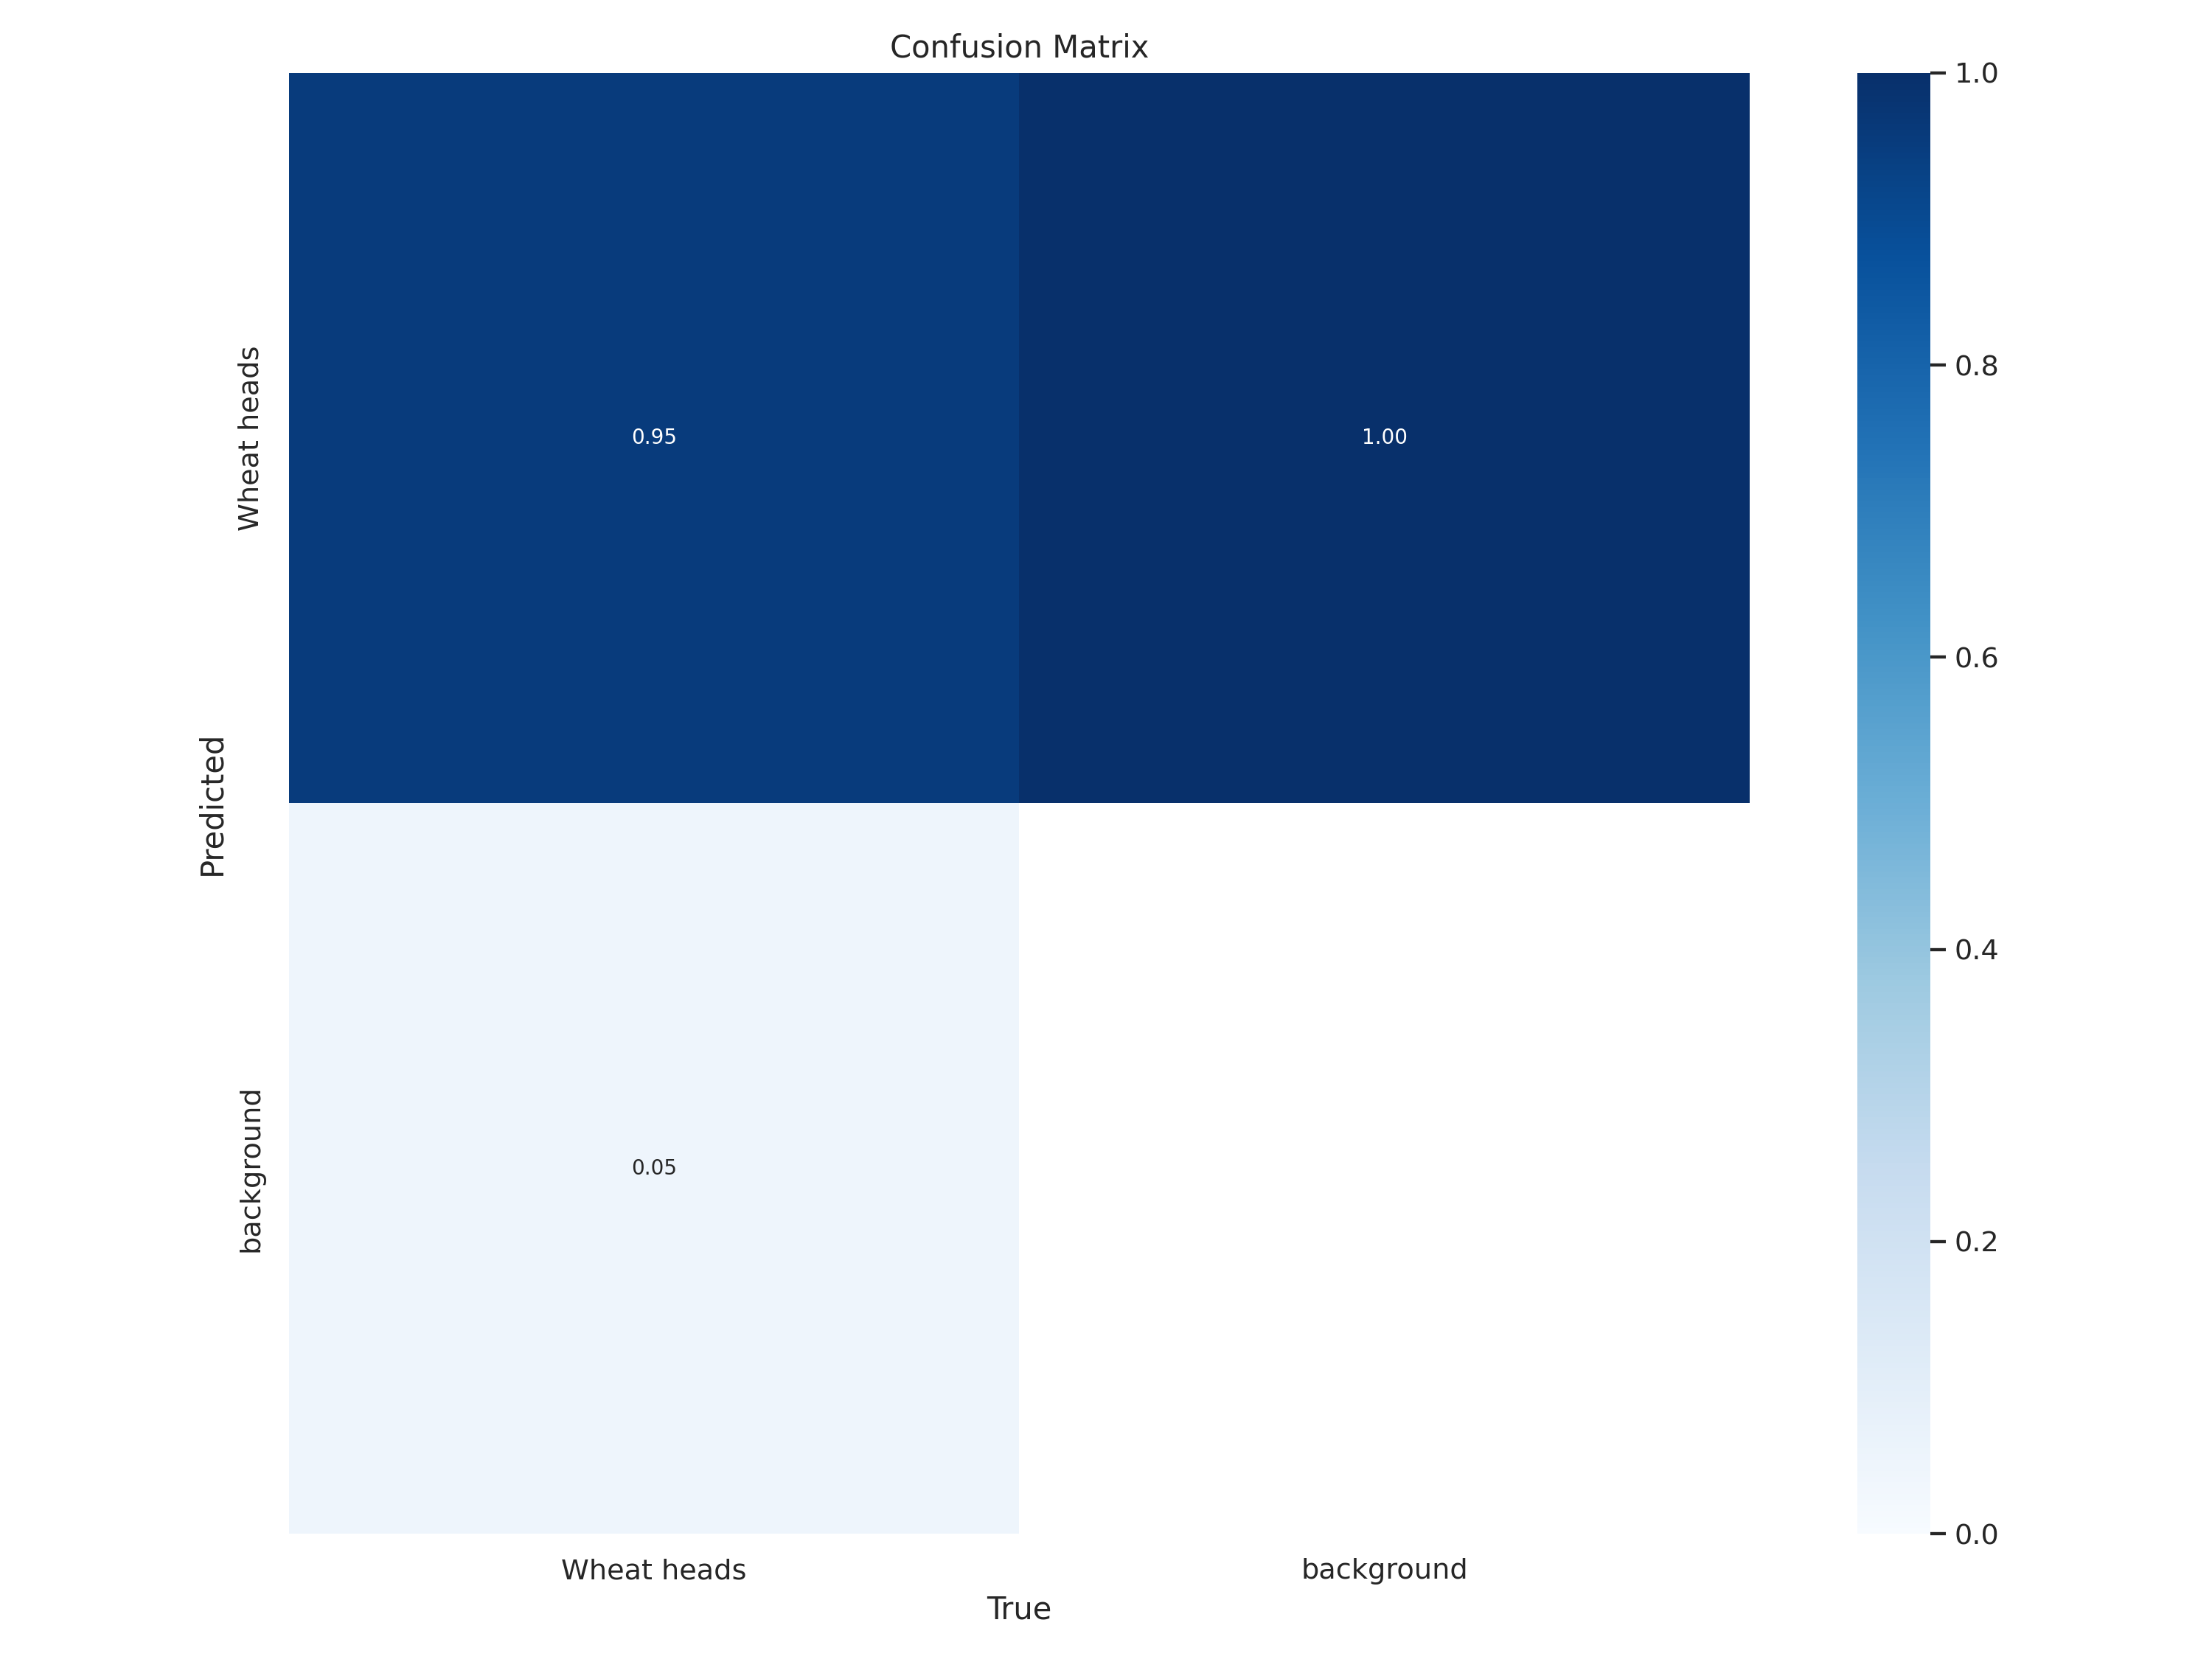

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=700)

/kaggle/working


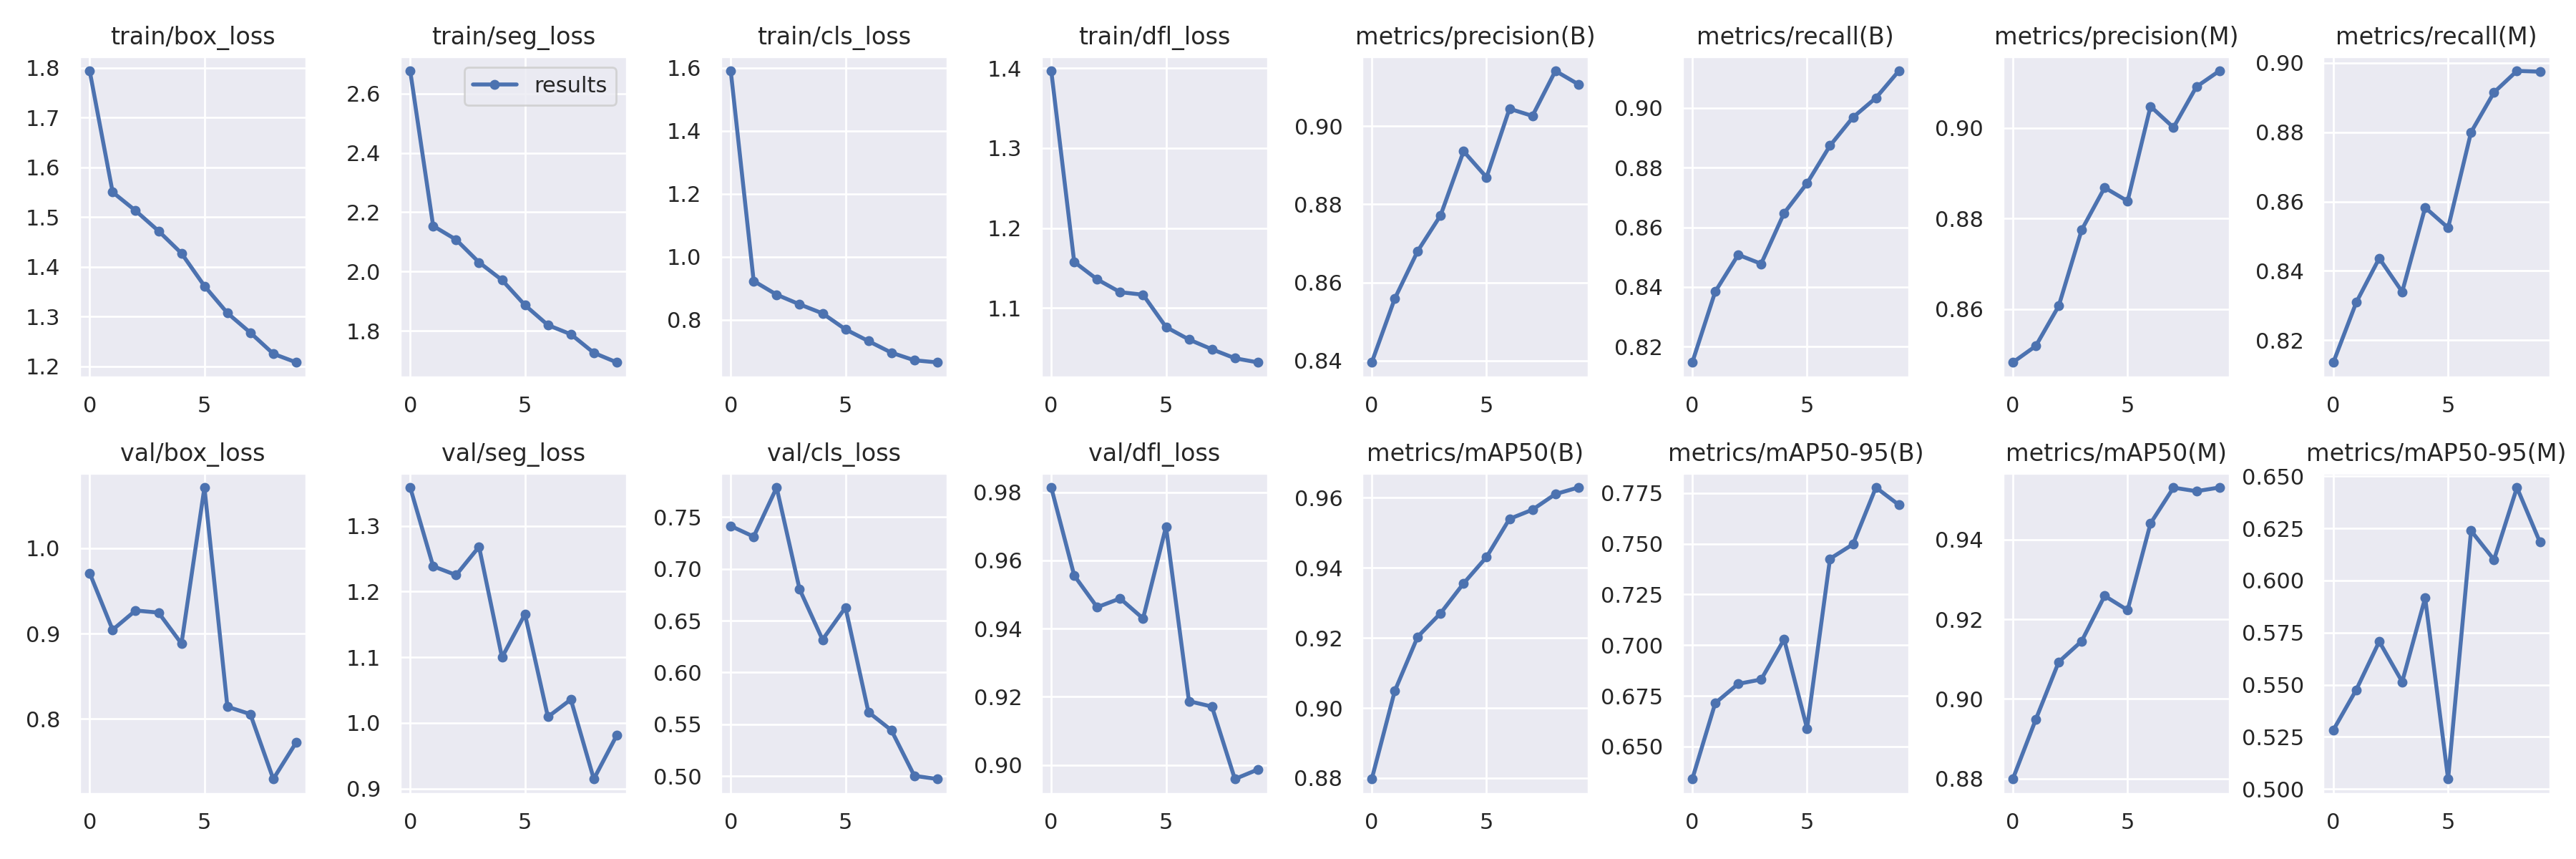

In [10]:
%cd {HOME}

Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/kaggle/working


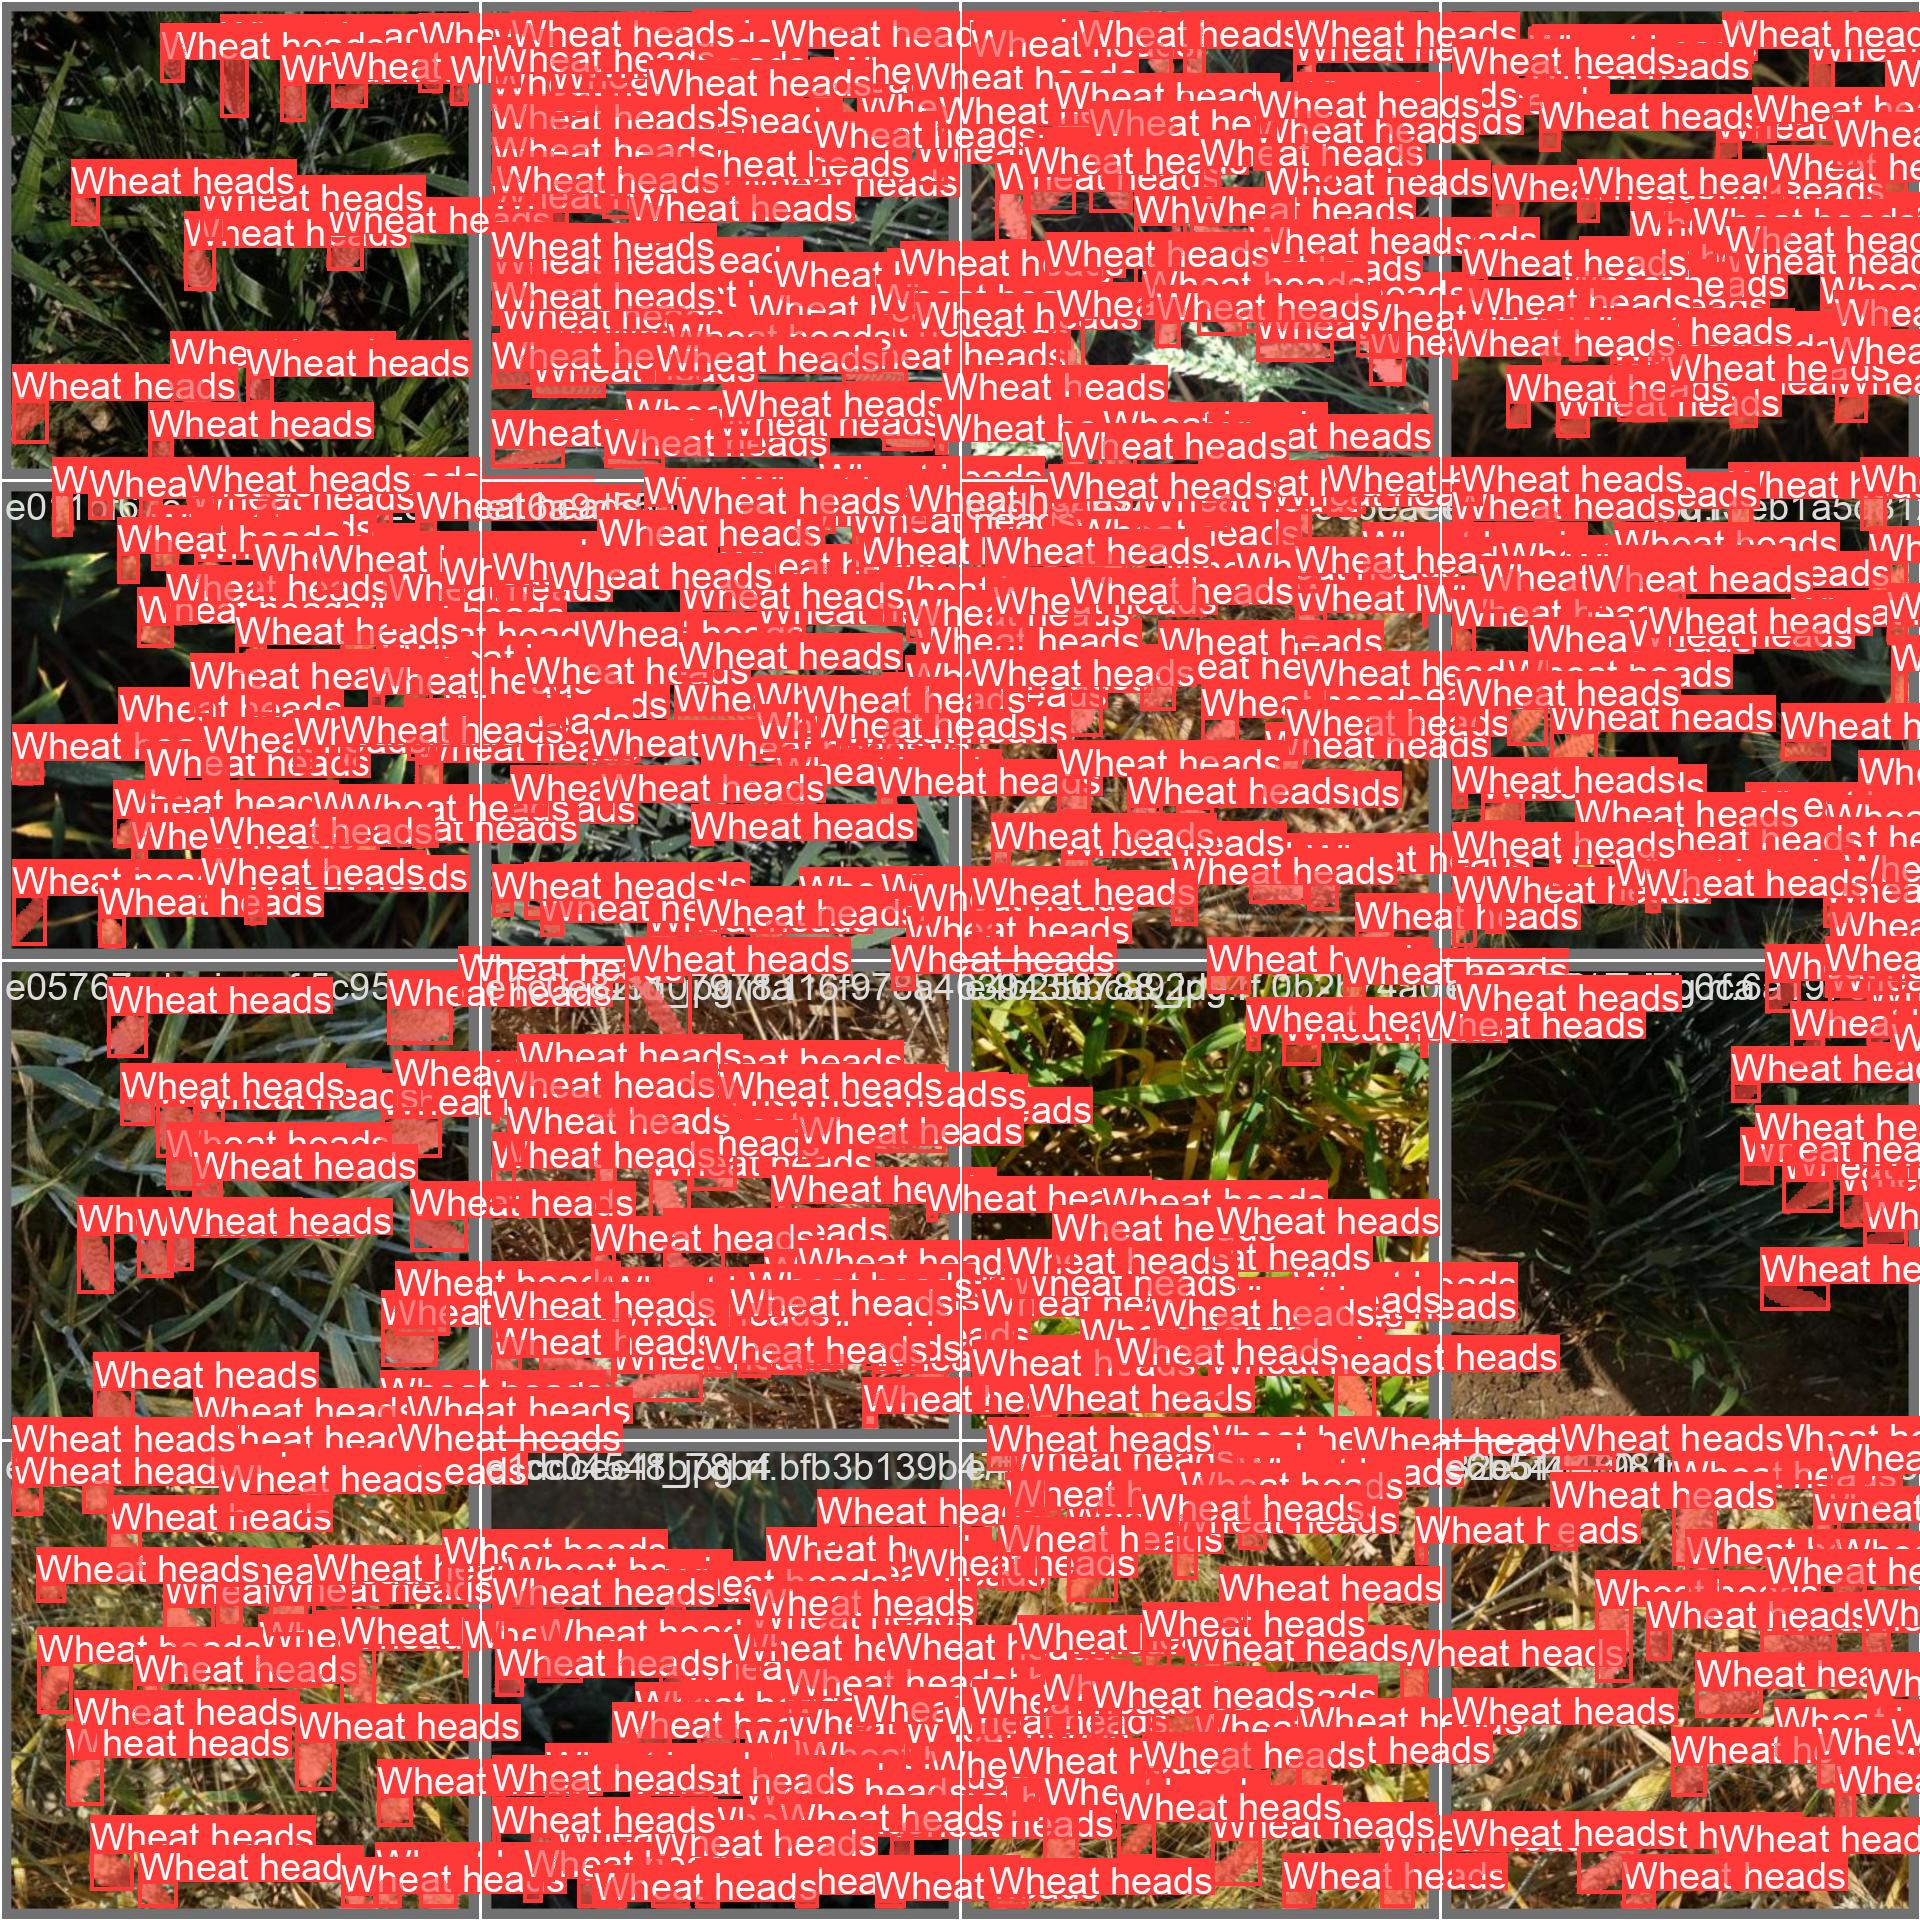

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch2_labels.jpg', width=800)

In [12]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
2024-03-05 00:28:01.268861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 00:28:01.268925: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 00:28:01.270744: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /kaggle/working/datasets/Wheat-heads-2/valid/labels.cache... 160 i
val: WARNING ⚠️ /kaggle/working/datasets/Wheat-heads-2/valid/images/d63350a3d_jpg.rf.4c

In [13]:
%cd {HOME}

!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=true

/kaggle/working
2024-03-05 00:29:04.098138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 00:29:04.098218: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 00:29:04.099714: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs

image 1/160 /kaggle/working/datasets/Wheat-heads-2/valid/images/c73f0a714_jpg.rf.d6d027d831fc733e76763416939c0104.jpg: 640x640 31 Wheat headss, 19.7ms
image 2/160 /kag

In [14]:
pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from ultralytics import YOLO
import onnxruntime as ort
# Load the YOLOv8 model
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')

# Export the model to ONNX format
model.export(format='onnx')  # creates 'yolov8n.onnx'

# Load the exported ONNX model
onnx_model = ort.InferenceSession('/kaggle/working/runs/segment/train/weights/best.onnx')


Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8m-seg summary (fused): 245 layers, 27222963 parameters, 0 gradients, 110.0 GFLOPs

PyTorch: starting from /kaggle/working/runs/segment/train/weights/best.pt with input shape (1, 3, 640, 640) and output shape (1, 37, 8400) (52.3 MB)

ONNX: starting export with onnx 1.15.0...
ONNX: export success ✅ 2.4s, saved as /kaggle/working/runs/segment/train/weights/best.onnx (104.1 MB)

Export complete (3.1s)
Results saved to /kaggle/working/runs/segment/train/weights
Predict:         yolo task=segment mode=predict model=/kaggle/working/runs/segment/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=segment mode=val model=/kaggle/working/runs/segment/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app


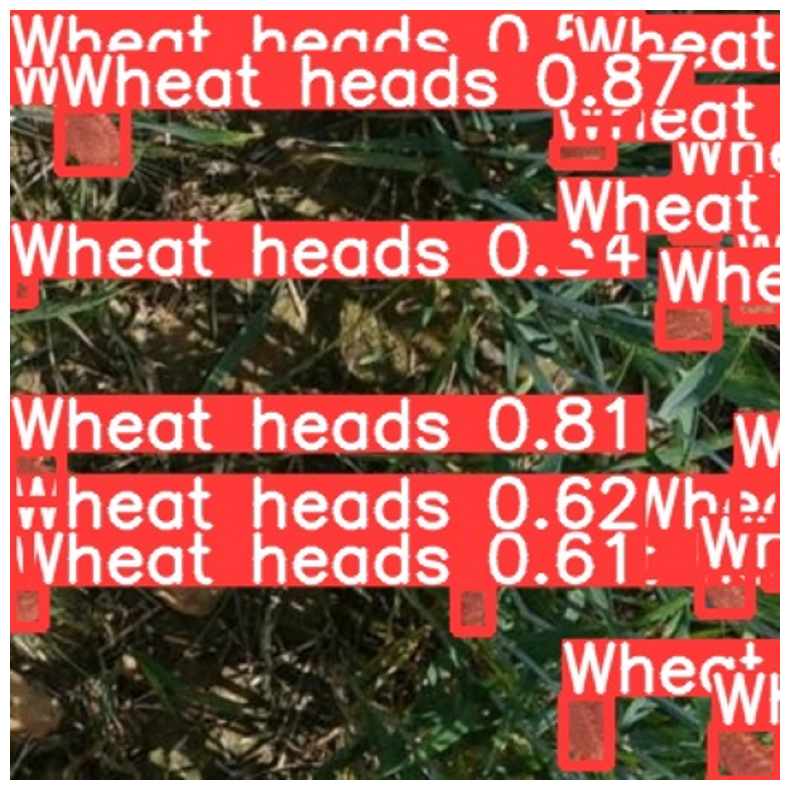

In [31]:
import onnxruntime
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the input dimensions expected by the model
model_input_width = 640
model_input_height = 640

# Load the ONNX model
onnx_model_path = "/kaggle/working/runs/segment/train/weights/best.onnx"
onnx_session = onnxruntime.InferenceSession(onnx_model_path)

# Load and preprocess the input image
image_path = "/kaggle/working/runs/segment/predict/d728e2fc2_jpg.rf.1f49bf551e677af676aa9ae098accda0.jpg"
image = Image.open(image_path)
# Preprocess the image (resize, normalize, etc.) to match the model's input requirements
image_resized = image.resize((model_input_width, model_input_height))
image_np = np.array(image_resized)
image_np = image_np.transpose(2, 0, 1)  # Convert from HWC to CHW format
image_np = image_np.astype(np.float32) / 255.0  # Normalize to [0, 1]
image_np = np.expand_dims(image_np, axis=0)  # Add batch dimension

# Run inference
input_name = onnx_session.get_inputs()[0].name
output = onnx_session.run(None, {input_name: image_np})


# Display the image with predictions
plt.figure(figsize=(10, 10))
plt.imshow(image_resized)
plt.axis('off')
plt.show()
